In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [21]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/intestine_CODEX/quantification/23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv')

In [22]:
df.columns

Index(['Unnamed: 0', 'MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f',
       'CD15', 'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR',
       'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90',
       'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34',
       'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CD117',
       'CD19', 'Podoplanin', 'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a', 'CD163',
       'CD161', 'x', 'y', 'array', 'Xcorr', 'Ycorr', 'Tissue_location',
       'tissue', 'donor', 'unique_region', 'region', 'OLFM4', 'FAP', 'CD25',
       'CollIV', 'CK7', 'MUC6', 'Cell Type', 'Cell Type em', 'Cell subtype',
       'Neighborhood', 'Neigh_sub', 'Neighborhood_Ind', 'NeighInd_sub',
       'Community', 'Major Community', 'Tissue Segment', 'Tissue Unit'],
      dtype='object')

In [23]:
df['donor'].unique()

array(['B004', 'B005', 'B006', 'B009', 'B010', 'B011', 'B012', 'B008'],
      dtype=object)

In [26]:
df.array

0          B004_CL
1          B004_CL
2          B004_CL
3          B004_CL
4          B004_CL
            ...   
2603212      colon
2603213      colon
2603214      colon
2603215      colon
2603216      colon
Name: array, Length: 2603217, dtype: object

In [24]:
df.Xcorr

0          13392.0
1          14596.0
2          15478.0
3          16995.0
4          16200.0
            ...   
2603212    11101.0
2603213    11093.0
2603214    11172.0
2603215     9825.0
2603216    10059.0
Name: Xcorr, Length: 2603217, dtype: float64

In [25]:
df.x

0          3984.0
1          5188.0
2          6070.0
3          7587.0
4          6792.0
            ...  
2603212    1693.0
2603213    1685.0
2603214    1764.0
2603215     417.0
2603216     651.0
Name: x, Length: 2603217, dtype: float64

In [6]:
df

,Unnamed: 0,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,...,Cell Type em,Cell subtype,Neighborhood,Neigh_sub,Neighborhood_Ind,NeighInd_sub,Community,Major Community,Tissue Segment,Tissue Unit
0,0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,...,NK,Immune,Mature Epithelial,Epithelial,Mature Epithelial,Epithelial,Plasma Cell Enriched,Immune,Mucosa,Mucosa
1,1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,...,NK,Immune,Transit Amplifying Zone,Epithelial,Mature Epithelial,Epithelial,Mature Epithelial,Epithelial,Mucosa,Mucosa
2,2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,...,NK,Immune,Innate Immune Enriched,Immune,Innate Immune Enriched,Immune,Innate Immune Enriched,Immune,Mucosa,Mucosa
3,3,-0.304219,-0.613068,-0.584499,-0.243757,-0.266696,-0.658449,-0.299027,-0.121460,-0.345381,...,NK,Immune,Stroma & Innate Immune,Stromal,Stroma & Innate Immune,Stromal,Stroma,Stroma,Subucosa,Submucosa
4,4,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,...,NK,Immune,Outer Follicle,Immune,Outer Follicle,Immune,Follicle,Immune,Mucosa,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603212,2603212,0.351916,0.693827,-0.081489,-0.240643,0.008875,0.143445,0.373710,-0.097896,0.869830,...,CD66+ Enterocyte,Epithelial,CD66+ Mature Epithelial,Epithelial,CD66+ Mature Epithelial,Epithelial,Secretory Epithelial,Epithelial,Mucosa,Mucosa
2603213,2603213,0.233642,0.171892,0.141842,-0.236145,-0.097772,-0.099283,0.626185,-0.105545,0.092076,...,CD66+ Enterocyte,Epithelial,CD66+ Mature Epithelial,Epithelial,CD66+ Mature Epithelial,Epithelial,Secretory Epithelial,Epithelial,Mucosa,Mucosa
2603214,2603214,-0.212237,-0.280904,-0.197833,-0.245638,-0.152563,-0.125035,0.430416,-0.105787,-0.038327,...,CD66+ Enterocyte,Epithelial,CD8+ T Enriched IEL,Immune,CD8+ T Enriched IEL,Immune,Mature Epithelial,Epithelial,Mucosa,Mucosa
2603215,2603215,-0.328666,0.607609,-0.180362,-0.247351,-0.143742,-0.169576,1.095596,-0.113879,0.370160,...,CD66+ Enterocyte,Epithelial,Transit Amplifying Zone,Epithelial,Mature Epithelial,Epithelial,CD66+ Mature Epithelial,Epithelial,Mucosa,Mucosa


In [4]:
df['Cell Type em'].unique()

array(['NK', 'Enterocyte', 'MUC1+ Enterocyte', 'TA', 'CD66+ Enterocyte',
       'Paneth', 'OLFM4+ Enterocyte', 'Smooth muscle', 'M1 Macrophage',
       'Goblet', 'Neuroendocrine', 'CD57+ Enterocyte', 'Lymphatic',
       'CD8+ T', 'DC', 'M2 Macrophage', 'B', 'Neutrophil', 'Endothelial',
       'Cycling TA', 'Plasma', 'CD4+ T cell', 'Stroma', 'Nerve', 'ICC',
       'CD7+ Immune', 'MUC6+ Enterocyte'], dtype=object)

In [5]:
df['Cell Type'].unique()

array(['NK', 'Enterocyte', 'MUC1+ Enterocyte', 'TA', 'CD66+ Enterocyte',
       'Paneth', 'Smooth muscle', 'M1 Macrophage', 'Goblet',
       'Neuroendocrine', 'CD57+ Enterocyte', 'Lymphatic', 'CD8+ T', 'DC',
       'M2 Macrophage', 'B', 'Neutrophil', 'Endothelial', 'Cycling TA',
       'Plasma', 'CD4+ T cell', 'Stroma', 'Nerve', 'ICC', 'CD7+ Immune'],
      dtype=object)

In [17]:
cell_type = set(df['Cell Type'].unique())
cell_type_em = set(df['Cell Type em'].unique())
only_in_cell_type = cell_type - cell_type_em
only_in_cell_type_em = cell_type_em - cell_type

In [18]:
only_in_cell_type

set()

In [19]:
only_in_cell_type_em

{'MUC6+ Enterocyte', 'OLFM4+ Enterocyte'}

In [29]:
len(df['region'].unique())

5

In [27]:
df.drop(columns=['Unnamed: 0', 'Tissue_location', 'tissue', 'donor', 
                 'region', 'Cell subtype', 'Cell Type', 'Neighborhood', 'Neigh_sub', 'Neighborhood_Ind',
                 'NeighInd_sub', 'Community', 'Major Community', 'Tissue Segment', 'Tissue Unit'], inplace=True)
df.rename(columns={'Cell Type em': 'cell_type'}, inplace=True)

In [30]:
df.columns

Index(['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15', 'CHGA',
       'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR', 'CD8', 'CD11c',
       'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90', 'aSMA', 'CD21',
       'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34', 'aDef5', 'CD7',
       'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CD117', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a', 'CD163', 'CD161', 'OLFM4',
       'FAP', 'CD25', 'CollIV', 'CK7', 'MUC6', 'Xcorr', 'Ycorr', 'array', 'x',
       'y', 'unique_region', 'cell_type'],
      dtype='object')

In [29]:
df = reorder_columns(df, 'unique_region', 'MUC6')
df = reorder_columns(df, 'y', 'MUC6')
df = reorder_columns(df, 'x', 'MUC6')
df = reorder_columns(df, 'array', 'MUC6')
df = reorder_columns(df, 'Ycorr', 'MUC6')
df = reorder_columns(df, 'Xcorr', 'MUC6')

In [17]:
df

,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,OLFM4,FAP,CD25,CollIV,CK7,MUC6,x,y,unique_region,cell_type
0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,-0.450794,...,NaN,NaN,NaN,NaN,-0.168582,NaN,3984.0,3387.0,B004_Ascending,NK
1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,-0.236199,...,NaN,NaN,NaN,NaN,-0.150520,NaN,5188.0,4116.0,B004_Ascending,NK
2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,-0.355383,...,NaN,NaN,NaN,NaN,-0.156116,NaN,6070.0,3146.0,B004_Ascending,NK
3,-0.304219,-0.613068,-0.584499,-0.243757,-0.266696,-0.658449,-0.299027,-0.121460,-0.345381,-0.450792,...,NaN,NaN,NaN,NaN,-0.136229,NaN,7587.0,2361.0,B004_Ascending,NK
4,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,-0.450797,...,NaN,NaN,NaN,NaN,-0.159834,NaN,6792.0,3891.0,B004_Ascending,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603212,0.351916,0.693827,-0.081489,-0.240643,0.008875,0.143445,0.373710,-0.097896,0.869830,0.579653,...,-0.100153,0.014524,0.077042,-0.582639,NaN,NaN,1693.0,2079.0,B008_Trans,CD66+ Enterocyte
2603213,0.233642,0.171892,0.141842,-0.236145,-0.097772,-0.099283,0.626185,-0.105545,0.092076,0.682969,...,-0.099490,-0.066511,-0.014087,-0.607179,NaN,NaN,1685.0,2127.0,B008_Trans,CD66+ Enterocyte
2603214,-0.212237,-0.280904,-0.197833,-0.245638,-0.152563,-0.125035,0.430416,-0.105787,-0.038327,-0.173319,...,-0.113319,-0.156416,-0.085273,-0.697211,NaN,NaN,1764.0,2608.0,B008_Trans,CD66+ Enterocyte
2603215,-0.328666,0.607609,-0.180362,-0.247351,-0.143742,-0.169576,1.095596,-0.113879,0.370160,-0.133272,...,-0.123759,-0.110227,-0.067961,-0.715124,NaN,NaN,417.0,5095.0,B008_Trans,CD66+ Enterocyte


In [19]:
df['unique_region'].unique()

array(['B004_Ascending', 'B005_Ascending', 'B006_Ascending', 'B009_Right',
       'B010_Right', 'B011_Right', 'B012_Right', 'B008_Right',
       'B004_Descending', 'B005_Descending', 'B006_Descending',
       'B009_Left', 'B012_Left', 'B011_Left', 'B010_Left', 'B008_Left',
       'B005_Duodenum', 'B004_Duodenum', 'B006_Duodenum', 'B009_Duodenum',
       'B011_Duodenum', 'B012_Duodenum', 'B010_Duodenum', 'B008_Duodenum',
       'B004_Ileum', 'B005_Ileum', 'B006_Ileum', 'B009_Ileum',
       'B010_Ileum', 'B011_Ileum', 'B012_Ileum', 'B008_Ileum',
       'B006_Mid-jejunum', 'B004_Mid-jejunum', 'B005_Mid-jejunum',
       'B009_Mid jejunum', 'B009_Mid jejunum_extra', 'B011_Mid jejunum',
       'B012_Mid jejunum', 'B010_Mid jejunum', 'B008_Mid jejunum',
       'B004_Proximal Jejunum', 'B005_Proximal Jejunum',
       'B006_Proximal Jejunum', 'B011_Proximal jejunum',
       'B009_Proximal jejunum', 'B010_Proximal jejunum',
       'B012_Proximal jejunum', 'B008_Proximal jejunum',
       'B008_Pr

In [31]:
df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/intestine_CODEX/quantification/processed/23_09_CODEX_HuBMAP_alldata_Dryad_merged_cleaned.csv', index=False)

In [ ]:
df.fillna(0, inplace=True)

In [43]:
X_columns = df.columns[:df.columns.get_loc('unique_region')]
obs_columns = df.columns[df.columns.get_loc('unique_region'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [47]:
adata.X.max()

1.280702119297199

In [45]:
adata.raw = adata
adata.X = np.arcsinh(adata.X/150)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [62]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


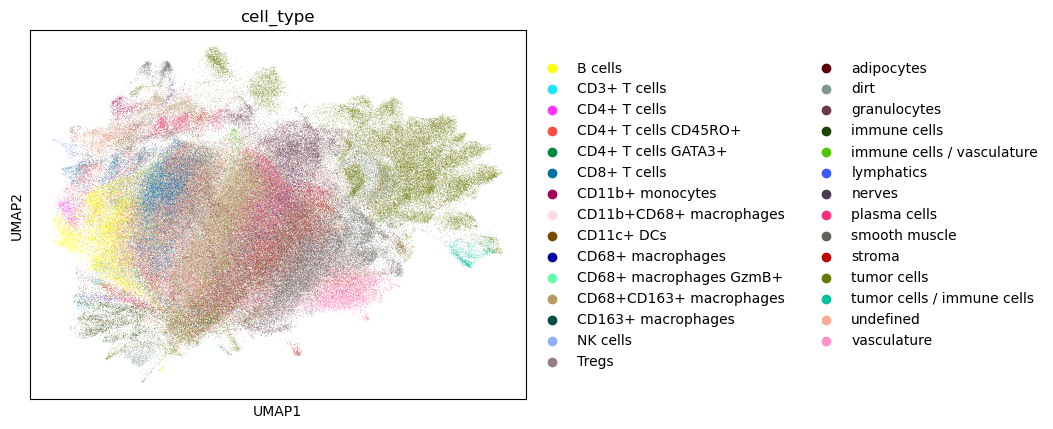

In [63]:
sc.pl.umap(adata, color='cell_type')

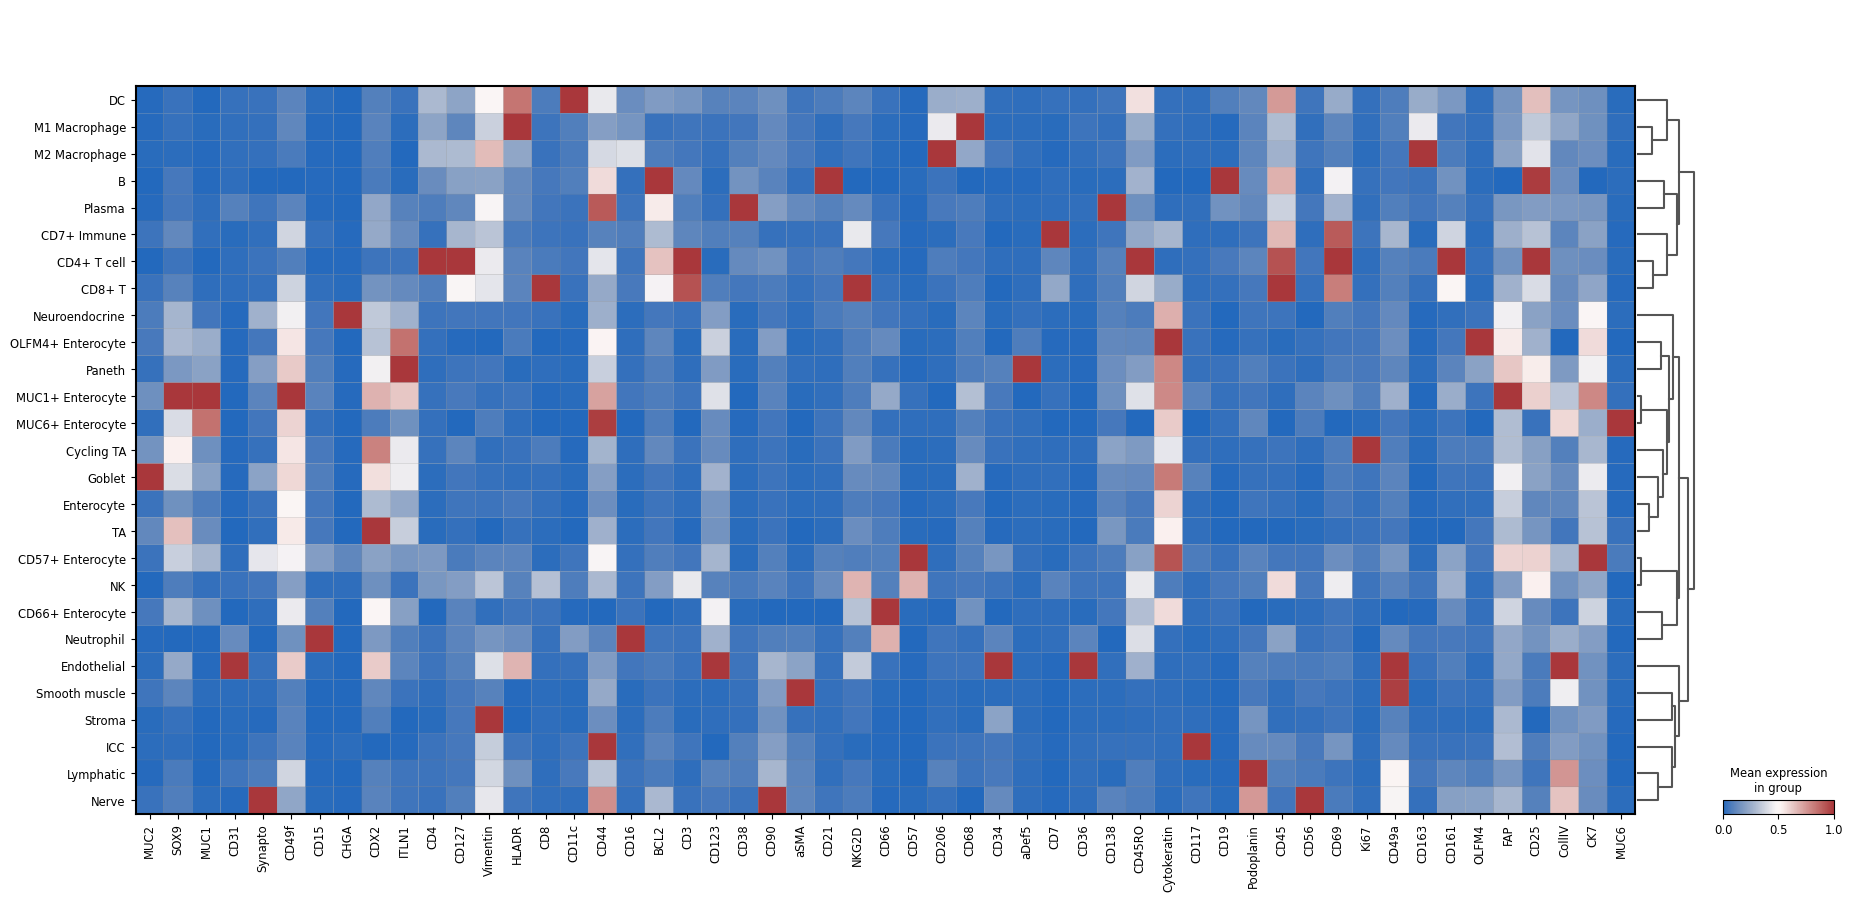

In [52]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='Cell Type em', cmap='vlag', dendrogram=True, use_raw=False, layer='zscore', standard_scale='var')

NK cells probably wrong? No CD56, low NKG2D

In [54]:
adata.obs['Cell Type em'].value_counts()

Cell Type em
Enterocyte           518588
Smooth muscle        384633
Stroma               220910
CD8+ T               214465
Endothelial          187420
Goblet               166366
Plasma               132655
CD4+ T cell          120296
M2 Macrophage        115345
Cycling TA            83538
Nerve                 79094
Lymphatic             65767
TA                    59294
CD66+ Enterocyte      50621
B                     35536
ICC                   34939
DC                    32581
M1 Macrophage         22616
Paneth                22587
Neuroendocrine        15524
Neutrophil            14945
CD7+ Immune            7657
NK                     5509
OLFM4+ Enterocyte      5459
MUC1+ Enterocyte       4171
CD57+ Enterocyte       1927
MUC6+ Enterocyte        774
Name: count, dtype: int64

In [56]:
sc.tl.rank_genes_groups(adata, groupby='Cell Type em' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_

In [60]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

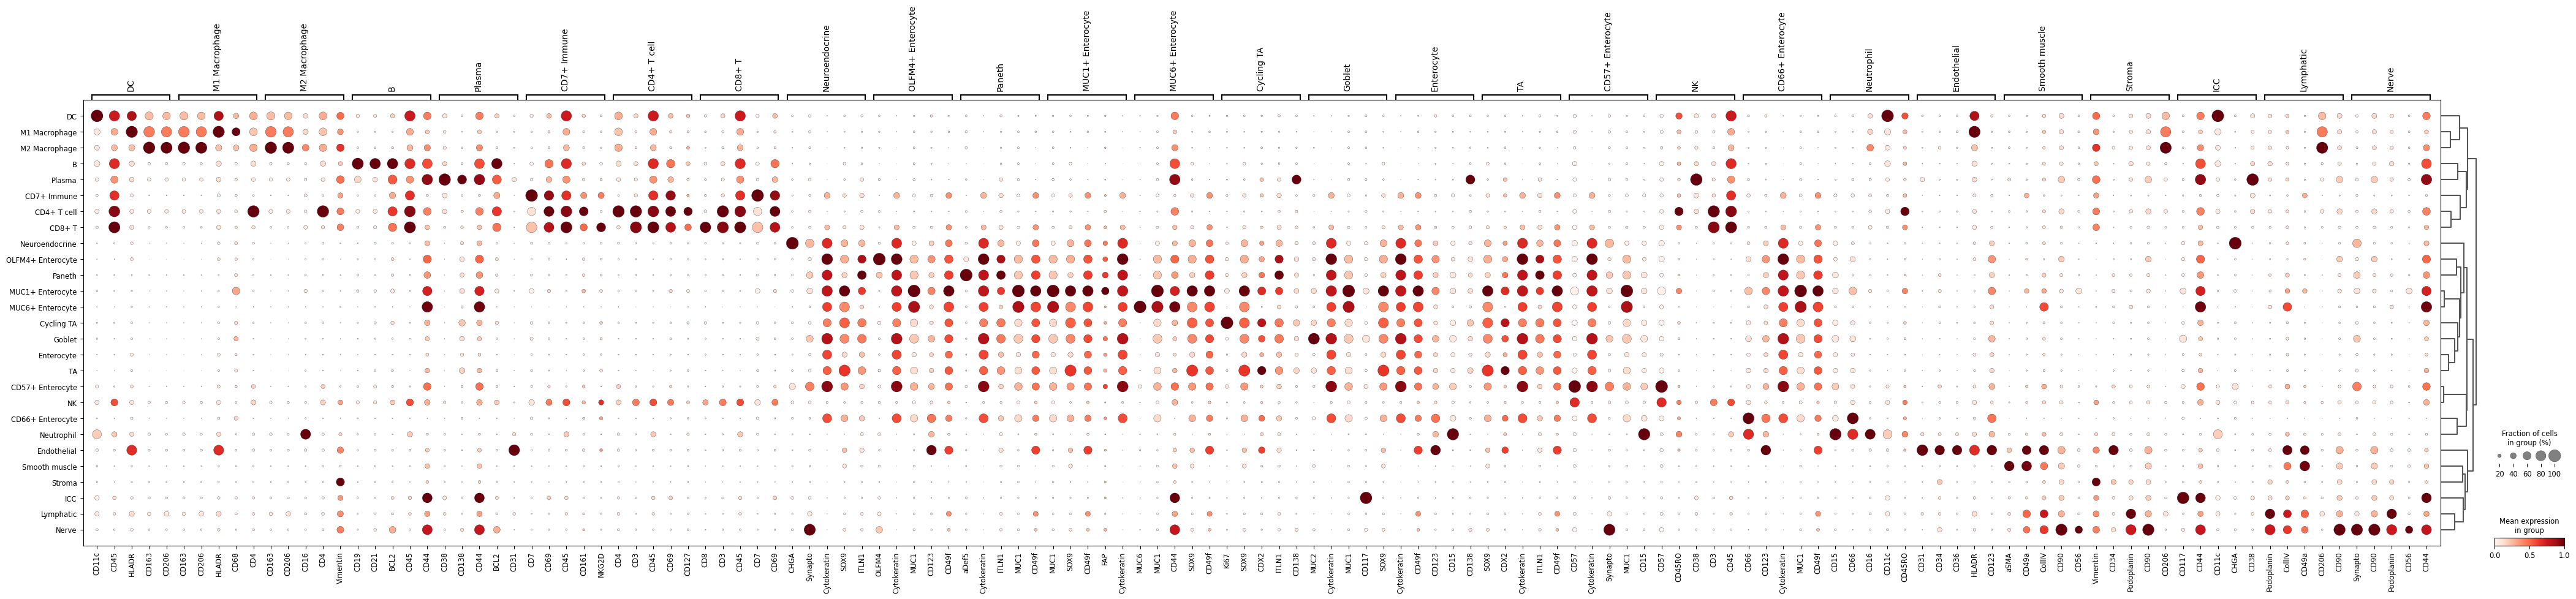

In [58]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')

categories: B, CD4+ T cell, CD7+ Immune, etc.
var_group_labels: B, CD4+ T cell, CD7+ Immune, etc.


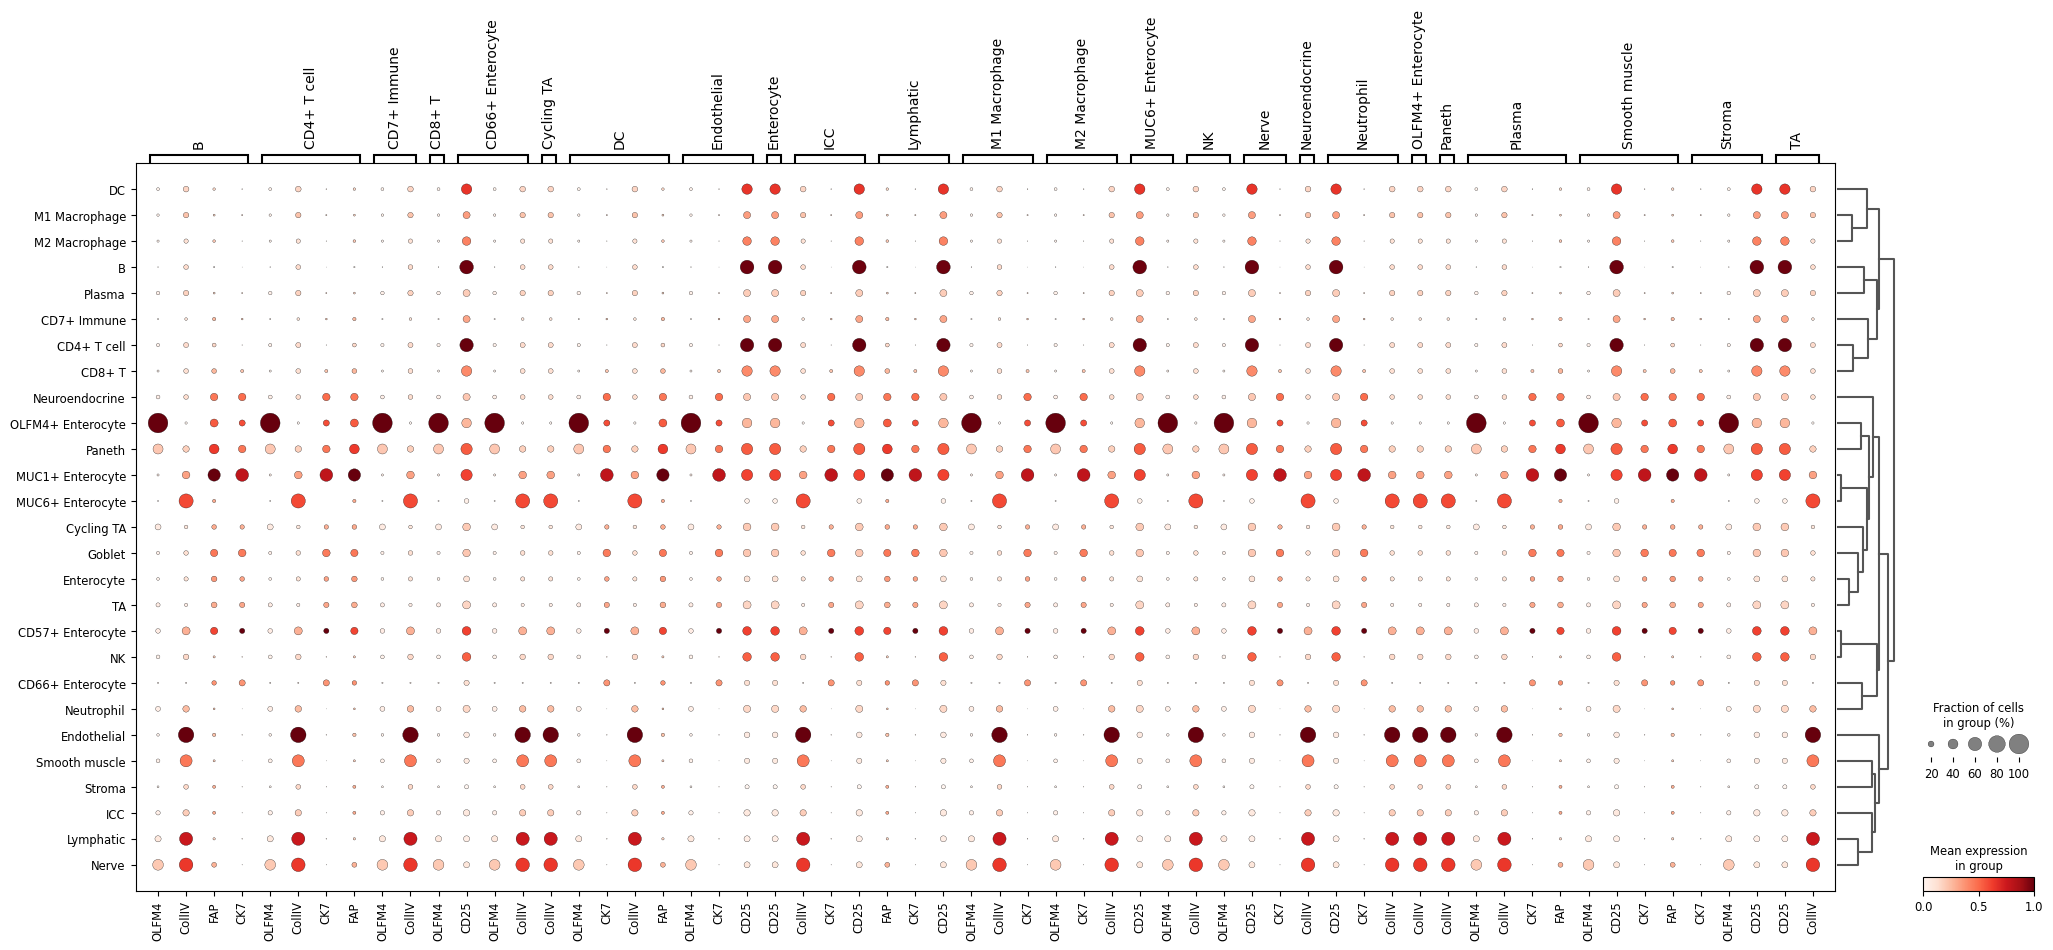

In [61]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')